#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, _get_covariance
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import zscore, shapiro
import scipy.stats as stats
import pandas_profiling
sns.set(color_codes=True)
%matplotlib inline

### Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]

#### Reading Data

In [3]:
fever = pd.read_csv('Fever.csv')
fever.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
fever.shape

(36, 4)

In [5]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
fever.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
B,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
Volunteer,36.0,2.500000,1.133893,1.0,1.750,2.5,3.250,4.0
Relief,36.0,7.183333,3.272090,2.3,4.675,6.0,9.325,13.5


In [6]:
fever.A.unique(),fever.B.unique()

(array([1, 2, 3], dtype=int64), array([1, 2, 3], dtype=int64))

##### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

##### One-way ANOVA Hypothesis for Ingredient A

###### H0 (Null Hypothesis):

    The mean relief hours are equal for all the three levels of ingredient A.
    
    μA1 = μA2 = μA3
    
###### HA (Alternate Hypothesis):

    The mean relief hours are not equal for all the three levels of ingredient A. There is atleast one pair, where the means are   unequal.
    
    μA1 ≠ μA2 ≠ μA3    

##### One-way ANOVA Hypothesis for Ingredient B

###### H0 (Null Hypothesis):

    The mean relief hours are equal for all the three levels of ingredient B.
    μB1 = μB2 = μB3
    
###### HA (Alternate Hypothesis):

    The mean relief hours are not equal for all the three levels of ingredient B.There is atleast one pair, where the means are   unequal.
    
    μB1 ≠ μB2 ≠ μB3    

##### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [6]:
# Converting variable A into Categorical data type
fever['A'] = pd.Categorical(fever['A'])

In [7]:
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
anova_A = anova_lm(model)
anova_A

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


In [9]:
4.578242e-07 < 0.05

True

Since the p-value is less than 0.05, the H0 can be rejected and HA can be accepted.

We can conclude that the mean relief hours are not equal for all the three levels of ingredient A. There is atleast one pair, where the means are   unequal.

##### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [8]:
# Converting variable A into Categorical data type
fever['B'] = pd.Categorical(fever['B'])

In [9]:
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
anova_B = anova_lm(model)
anova_B

,df,sum_sq,mean_sq,F,PR(>F)
C(B),2.0,123.66,61.830000,8.126777,0.00135
Residual,33.0,251.07,7.608182,NaN,NaN


In [12]:
0.00135 < 0.05

True

Since the p-value is less than 0.05, the H0 can be rejected and HA can be accepted.

We can conclude that the mean relief hours are not equal for all the three levels of ingredient B. There is atleast one pair, where the means are unequal.

##### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]

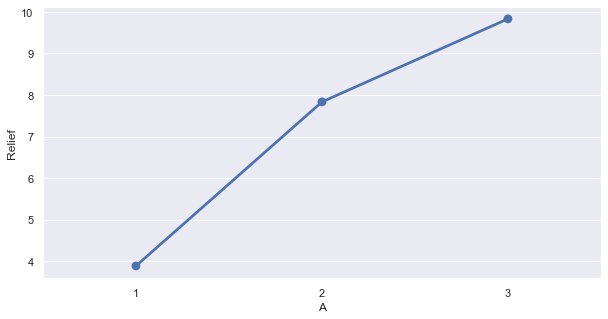

In [19]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'A', y = 'Relief', data = fever, ci=None);

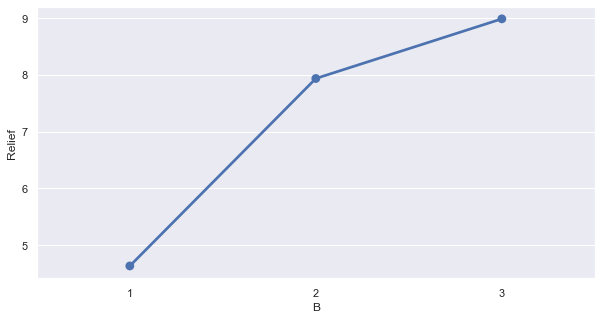

In [20]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'B', y = 'Relief', data = fever, ci=None);

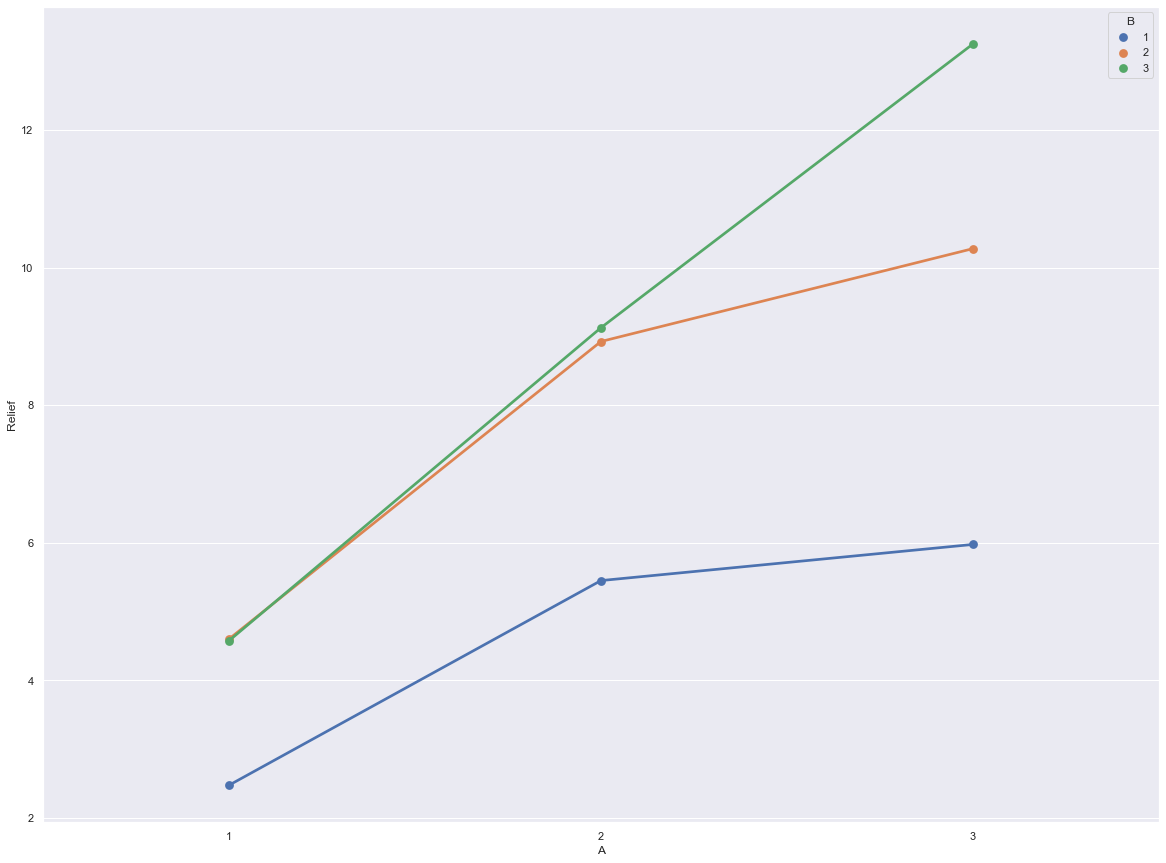

In [21]:
plt.figure(figsize=(20,15))
sns.pointplot(x = 'A', y = 'Relief', hue = 'B', data = fever, ci=None);

##### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) and state your results.

###### H0 (Null Hypothesis):

The mean relief hours with respect to each of the three levels of both ingredients A and B are equal.

    
###### HA (Alternate Hypothesis):

At least one of the means of relief hours with respect to each of the three levels of both ingredients A and B is not equal, i.e. there is at least one pair, where the means are unequal.


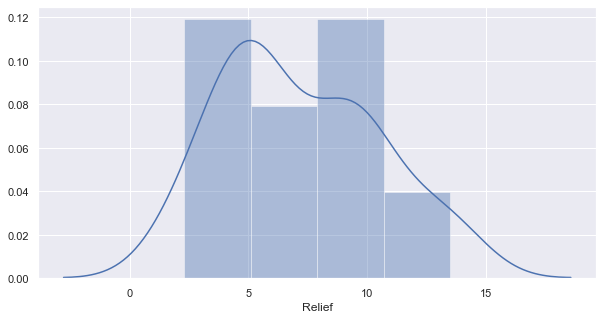

In [5]:
# We are checking whether the dependent variable Relief is normally distributed
plt.figure(figsize=(10,5))
sns.distplot(fever['Relief']);

In [13]:
stat, p_normal = shapiro(fever.Relief)
p_normal, p_normal < 0.05

(0.02178293839097023, True)

The Shapiro test also shows that Relief is not exactly normally distributed since p value is less than 0.05.
The distribution plot shows that it is a bit right skewed. Perhaps, if more number of samples os taken then it will be normally distributed.

For the sake of the test, we will assume it is normally distributed

In [11]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, fever).fit()
anova_AB = anova_lm(model)
anova_AB

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


In [22]:
(anova_AB['PR(>F)'] < 0.05).to_frame()

,PR(>F)
C(A),True
C(B),True
C(A):C(B),True
Residual,False


##### 1.6) Mention the business implications of performing ANOVA for this particular case study.

In [25]:
print("There are only {} samples".format(fever.shape[0]))

There are only 36 samples


In [27]:
fever['Relief'].skew()

0.4130293344276467

1. The distribution of the dependent variable "Relief" is a little right-skewed, and not normally distributed (skewness value closer to 0 like 0.05, 0.04..etc). In order to get more accurate results, it is probably better if a larger sample size is taken.


2. Although the ANOVA test has displayed that there is a difference in the Relief means with respect to each category of Ingredients A and B, it does not say exactly which pair has the difference in means. So a follow-up T-test (in pairs) or a TukeyHSD multicomparison needs to be done further.  

### Problem 2 

The dataset Education+-+Post+12th+Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary-3.xlsx

##### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [26]:
# Reading File
education = pd.read_csv('Education - Post 12th Standard-1.csv')
education.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [34]:
education.shape

(777, 18)

In [35]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

We can see that all the variables except Names are numerical (int or float)

In [3]:
education.Names.nunique()

777

In [113]:
education.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


#### Data Cleaning

In [4]:
education.isnull().any().sum()

0

In [5]:
education.duplicated().sum()

0

In [7]:
education[education.eq(0).any(1)]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
104,Central Washington University,2785,2011,1007,8,65,6507,898,7242,3603,654,1416,67,89,18.1,0,6413,51
678,University of Southern Colorado,1401,1239,605,10,34,3716,675,7100,4380,540,2948,63,88,19.4,0,5389,36


##### Univariate Analysis

In [8]:
def univariate_analysis(data_df, column):
    print('------------------------------------------------------------------------------------------')
    print(str(column).upper(),'\t',data_df[column].dtype.name,'\n------------------------------------------------------------------------------------------\n')
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    a = sns.boxplot(data_df[column], ax = axes[0], orient='v')
    a.set_title("Boxplot", fontsize = 12)
    
    a = sns.distplot(data_df[column], ax = axes[1])
    a.set_title("Distribution plot", fontsize = 12)
    
    plt.show()

------------------------------------------------------------------------------------------
APPS 	 int64 
------------------------------------------------------------------------------------------



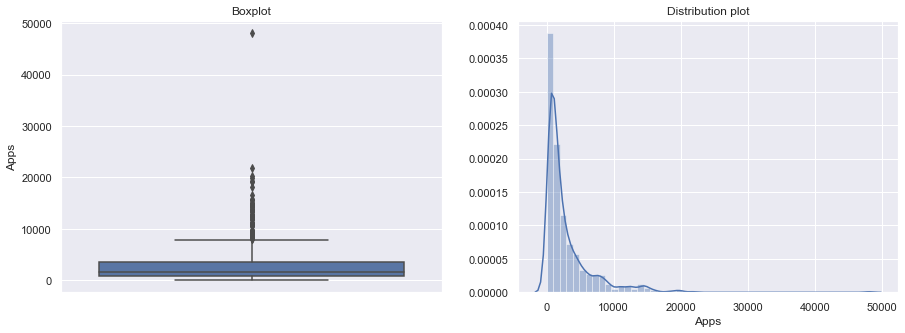

------------------------------------------------------------------------------------------
ACCEPT 	 int64 
------------------------------------------------------------------------------------------



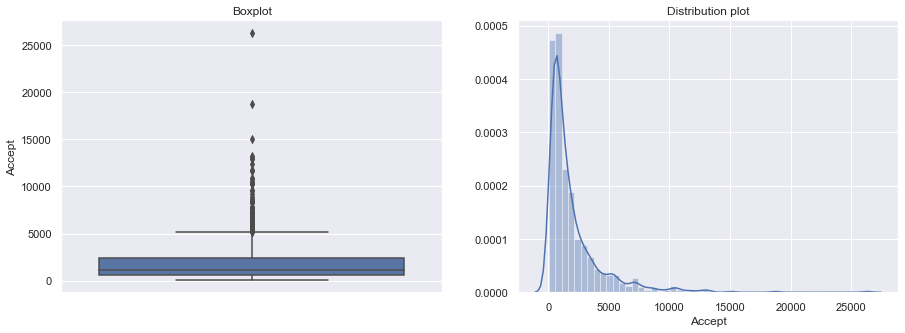

------------------------------------------------------------------------------------------
ENROLL 	 int64 
------------------------------------------------------------------------------------------



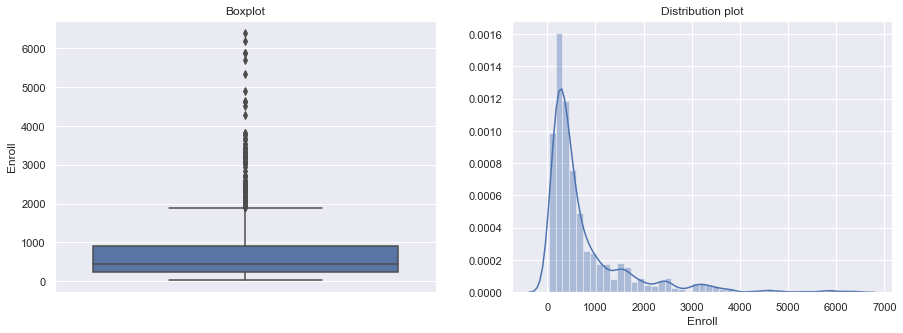

------------------------------------------------------------------------------------------
TOP10PERC 	 int64 
------------------------------------------------------------------------------------------



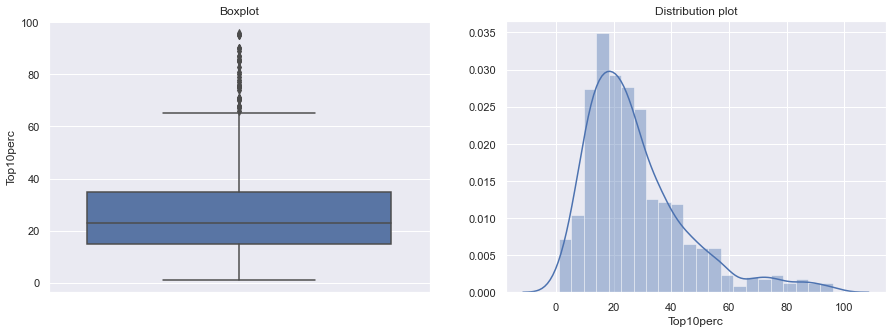

------------------------------------------------------------------------------------------
TOP25PERC 	 int64 
------------------------------------------------------------------------------------------



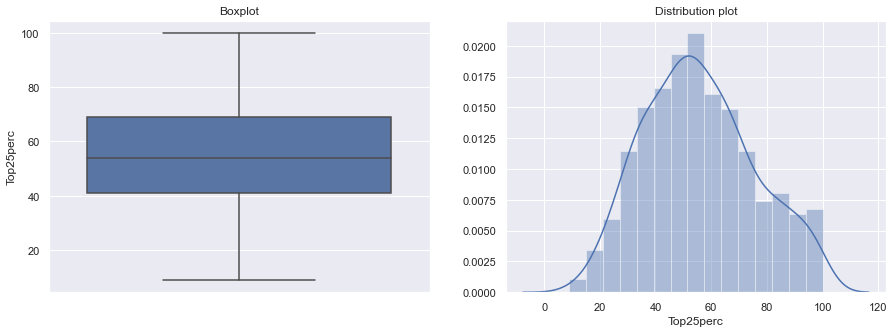

------------------------------------------------------------------------------------------
F.UNDERGRAD 	 int64 
------------------------------------------------------------------------------------------



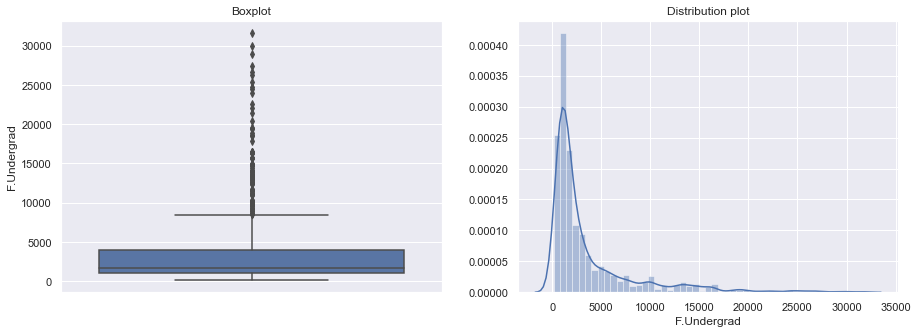

------------------------------------------------------------------------------------------
P.UNDERGRAD 	 int64 
------------------------------------------------------------------------------------------



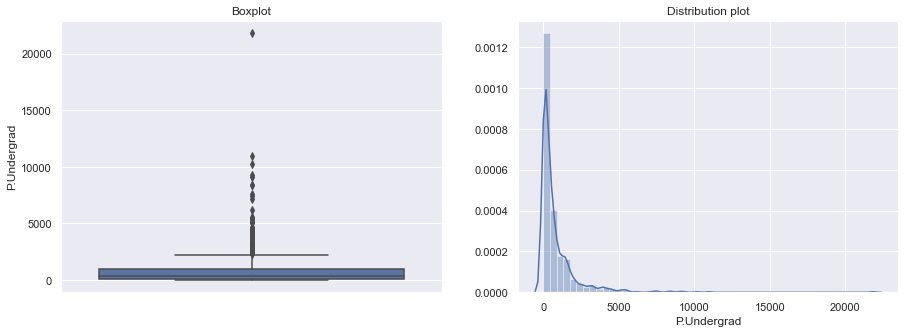

------------------------------------------------------------------------------------------
OUTSTATE 	 int64 
------------------------------------------------------------------------------------------



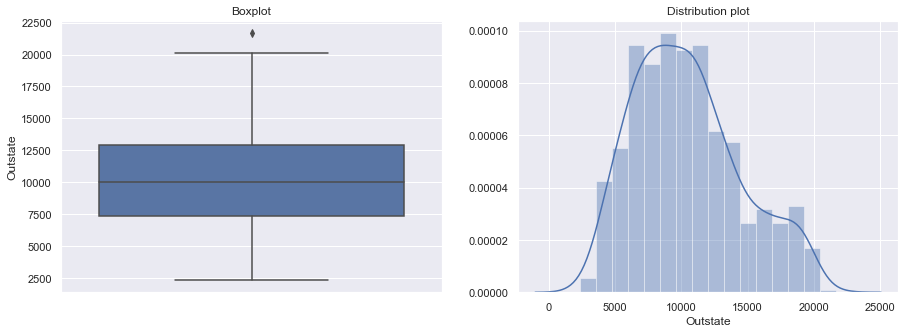

------------------------------------------------------------------------------------------
ROOM.BOARD 	 int64 
------------------------------------------------------------------------------------------



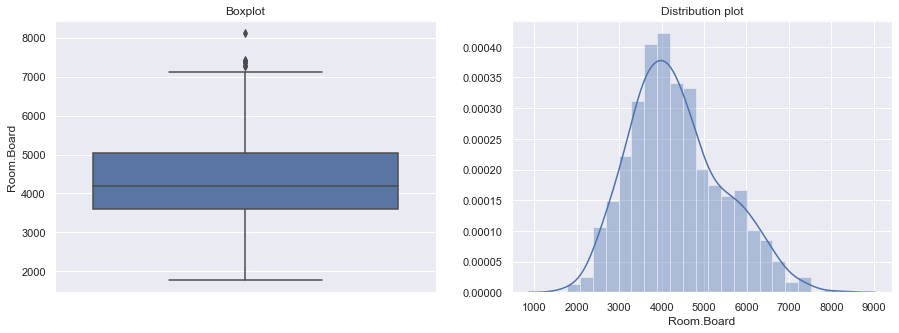

------------------------------------------------------------------------------------------
BOOKS 	 int64 
------------------------------------------------------------------------------------------



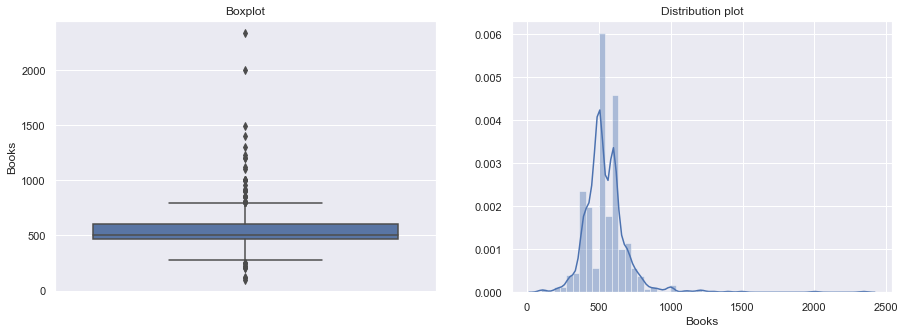

------------------------------------------------------------------------------------------
PERSONAL 	 int64 
------------------------------------------------------------------------------------------



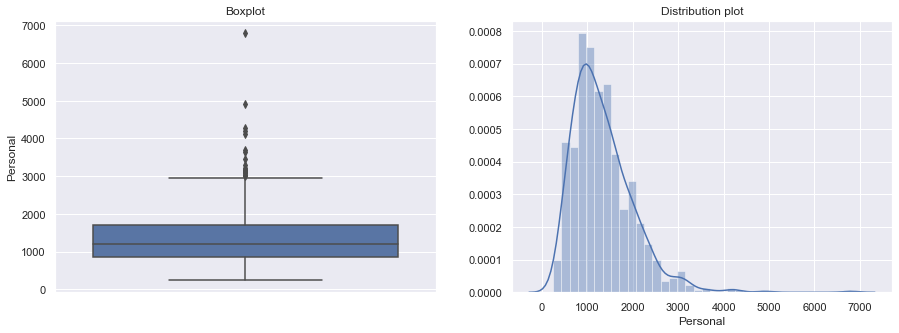

------------------------------------------------------------------------------------------
PHD 	 int64 
------------------------------------------------------------------------------------------



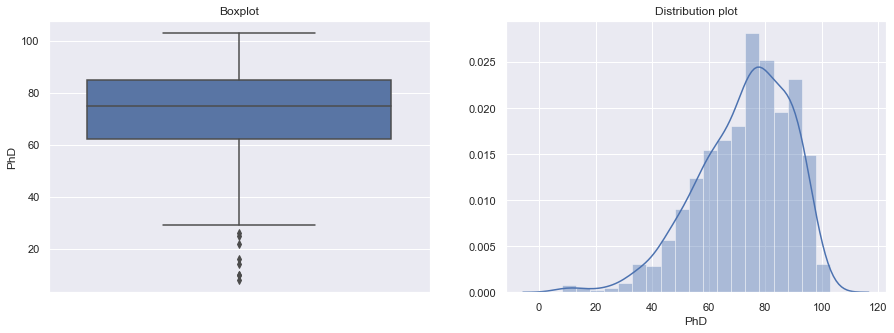

------------------------------------------------------------------------------------------
TERMINAL 	 int64 
------------------------------------------------------------------------------------------



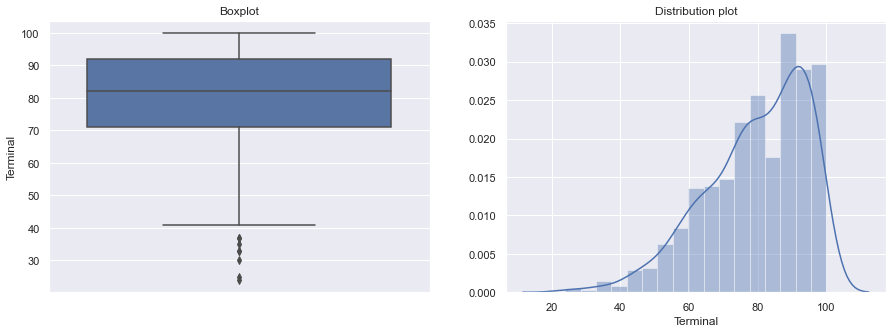

------------------------------------------------------------------------------------------
S.F.RATIO 	 float64 
------------------------------------------------------------------------------------------



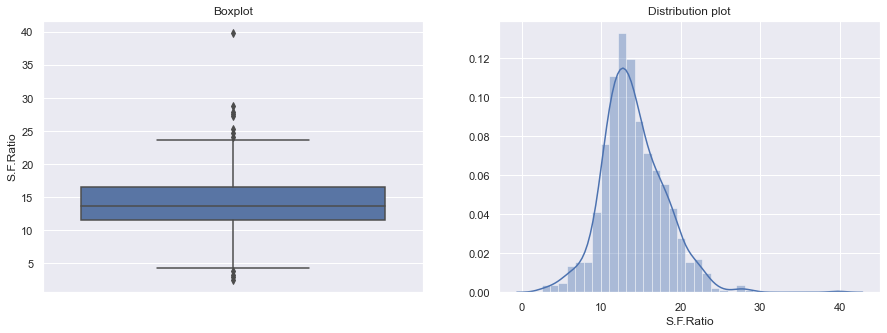

------------------------------------------------------------------------------------------
PERC.ALUMNI 	 int64 
------------------------------------------------------------------------------------------



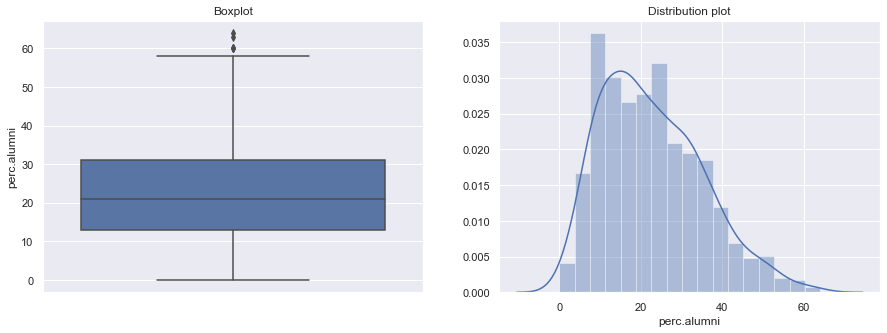

------------------------------------------------------------------------------------------
EXPEND 	 int64 
------------------------------------------------------------------------------------------



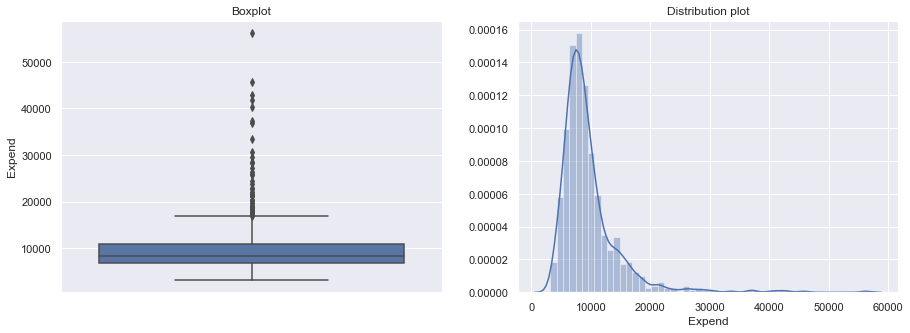

------------------------------------------------------------------------------------------
GRAD.RATE 	 int64 
------------------------------------------------------------------------------------------



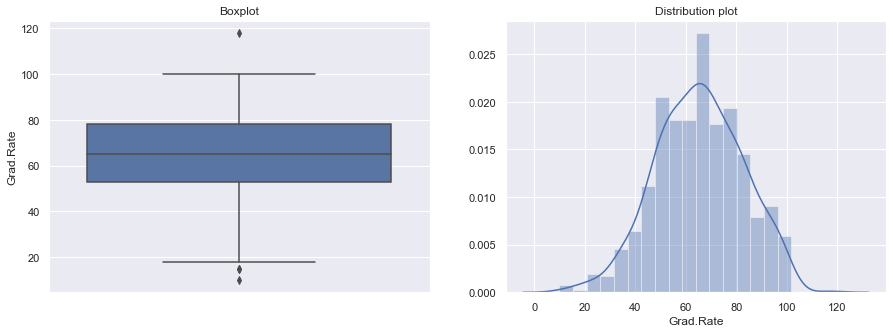

In [16]:
for column in education.columns:
    if ((education[column].dtype.name == 'int64') | (education[column].dtype.name == 'float64')):
        univariate_analysis(education, column)

We can see that almost all the variables have outliers

#### Multivariate Analysis

In [3]:
education_corr = education.corr()
education_corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


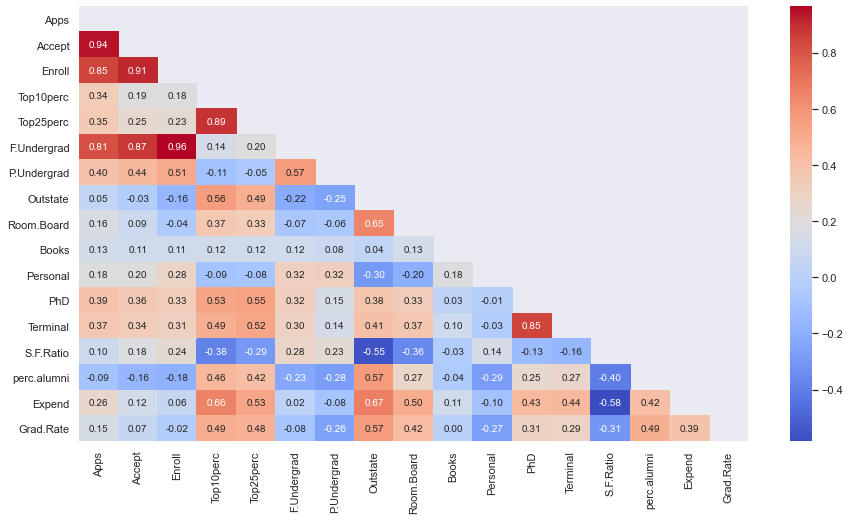

In [10]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(education.corr(method='pearson')))
sns.heatmap(education.corr(), annot=True, fmt='.2f', mask=mask, cmap='coolwarm');

In [109]:
def multivariate_analysis(data_corr, thresh):
    thresh_mask = (np.abs(data_corr) > thresh)
    corr = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation'])
    corr_temp = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation'])
    
    for i,j in zip(np.where(thresh_mask)[0], np.where(thresh_mask)[1]):
        if data_corr.columns[i] != data_corr.columns[j]:
            corr_temp['Variable 1'] = [data_corr.columns[i]]
            corr_temp['Variable 2'] = [data_corr.columns[j]]
            corr_temp['Correlation'] = [data_corr.iloc[i,j]]
            corr = corr.append(corr_temp)

            fig, axes = plt.subplots(nrows = 1, ncols = 1)
            fig.set_size_inches(12,5)
            a = sns.lineplot(data_corr[data_corr.columns[i]], data_corr[data_corr.columns[j]], ax = axes);
            
    corr = corr.drop_duplicates(['Correlation'])
    corr = corr.sort_values('Correlation', ascending=False)
    corr.index = np.arange(0,corr.shape[0])
    return corr     

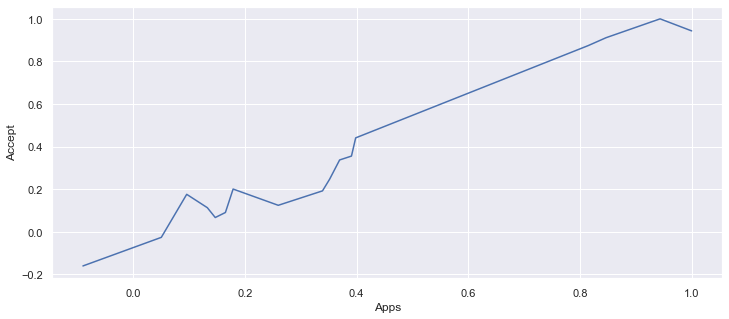

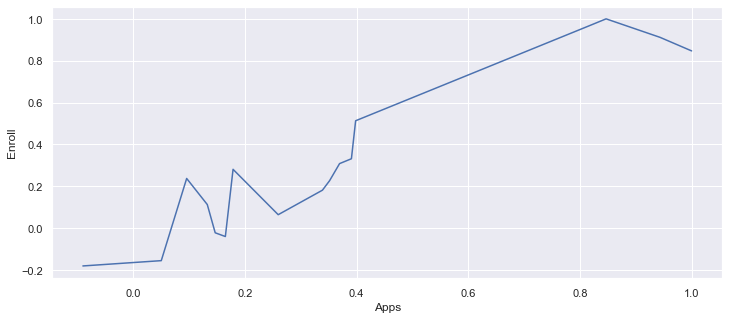

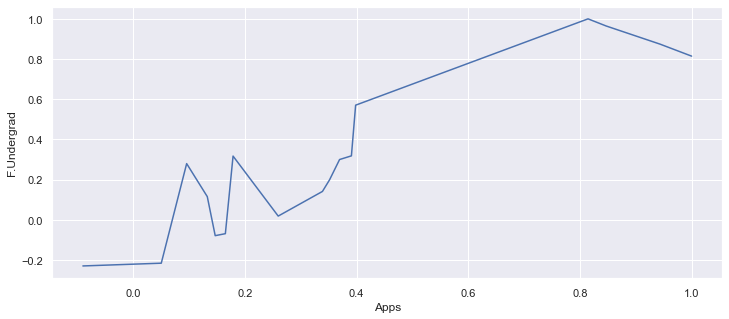

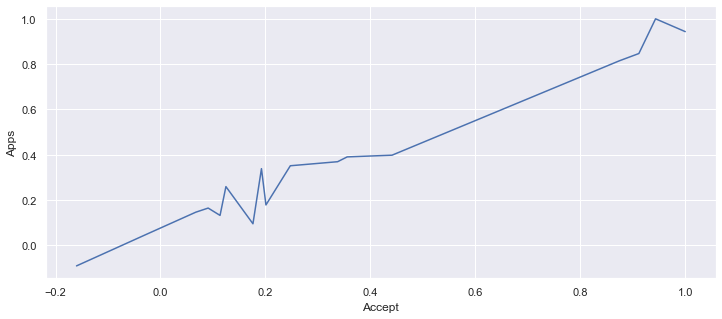

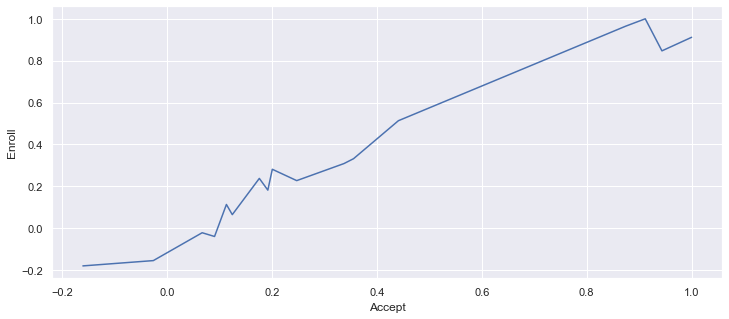

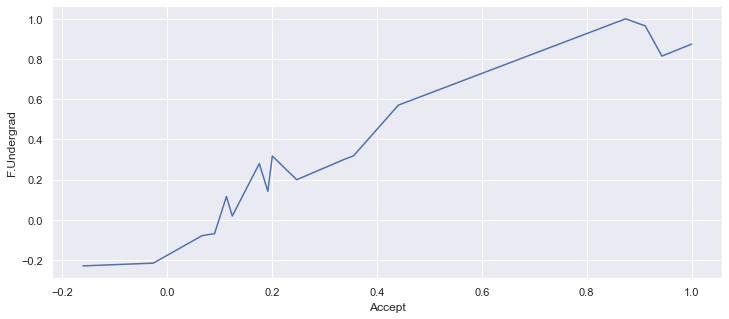

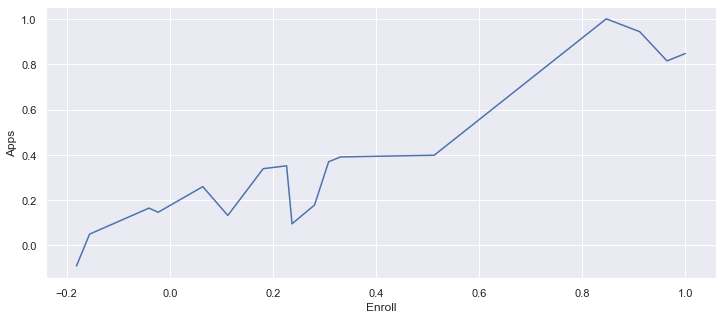

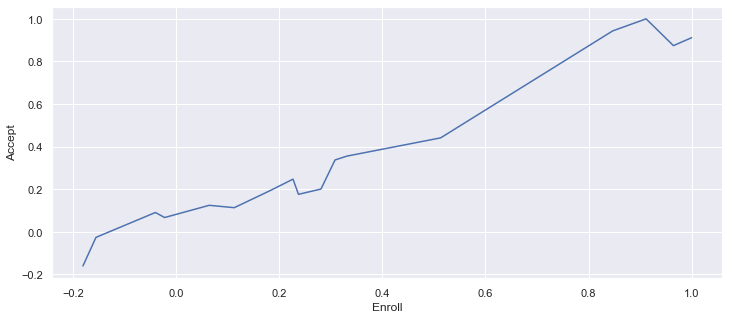

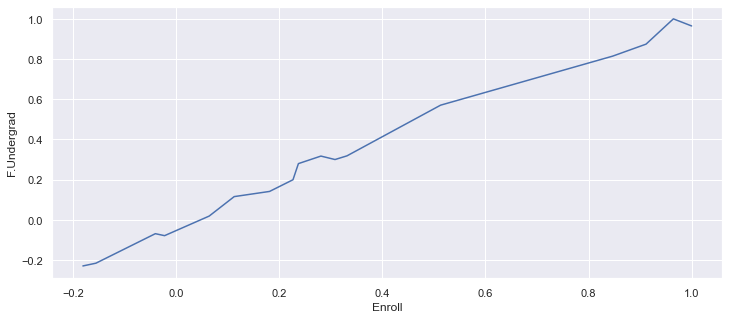

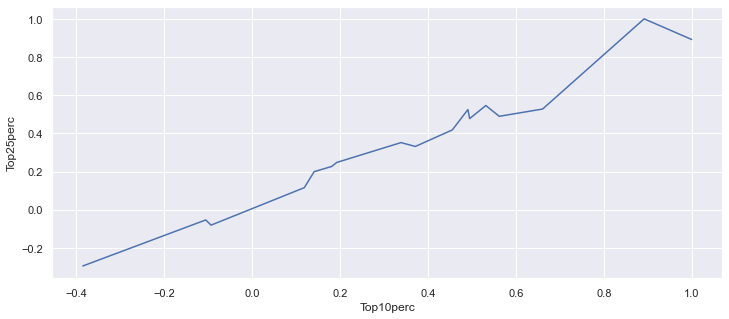

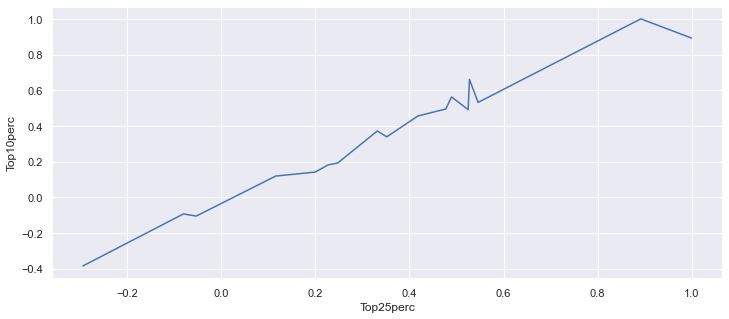

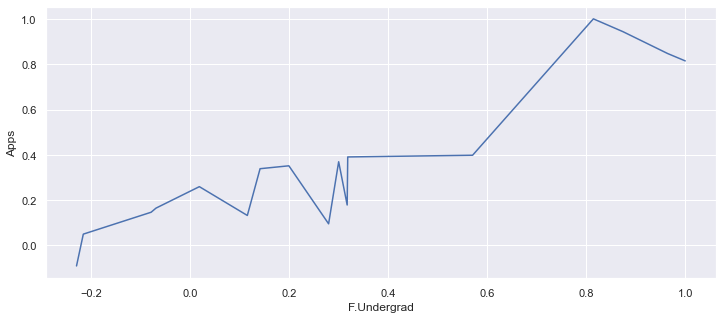

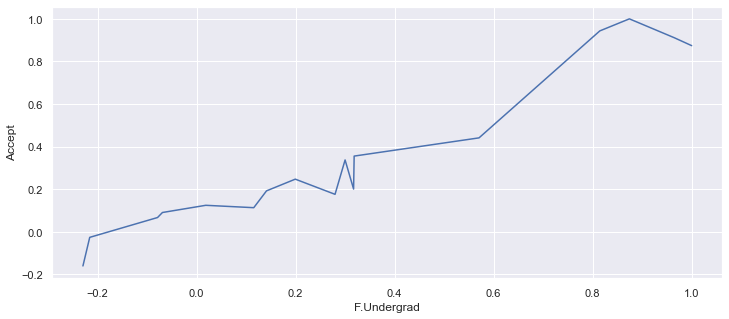

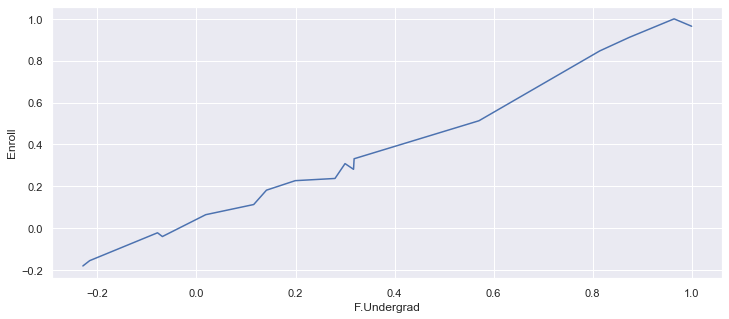

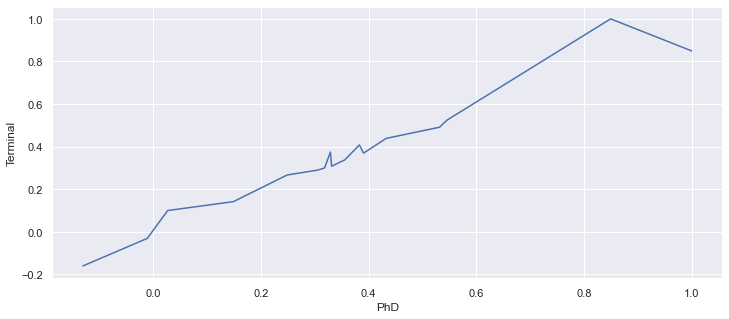

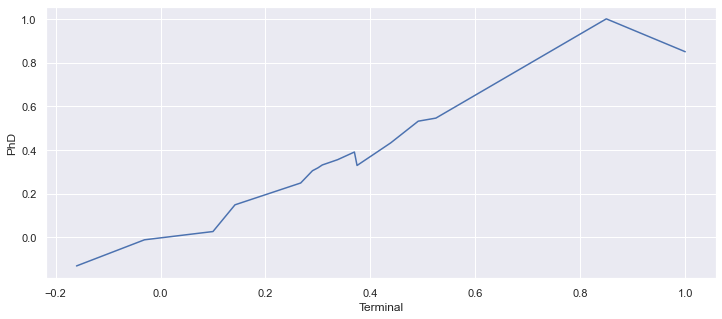

In [110]:
threshold = 0.80
corr_fields = multivariate_analysis(education_corr, threshold)

In [111]:
corr_fields

,Variable 1,Variable 2,Correlation
0,Enroll,F.Undergrad,0.964640
1,Apps,Accept,0.943451
2,Accept,Enroll,0.911637
3,Top10perc,Top25perc,0.891995
4,Accept,F.Undergrad,0.874223
5,PhD,Terminal,0.849587
6,Apps,Enroll,0.846822
7,Apps,F.Undergrad,0.814491


#### 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

##### >>>>>>>>>>>  Standard Scaling Original Dataframe

In [4]:
education_scaled = education.copy()
education_scaled = education_scaled.iloc[:,1:].apply(zscore)
education_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


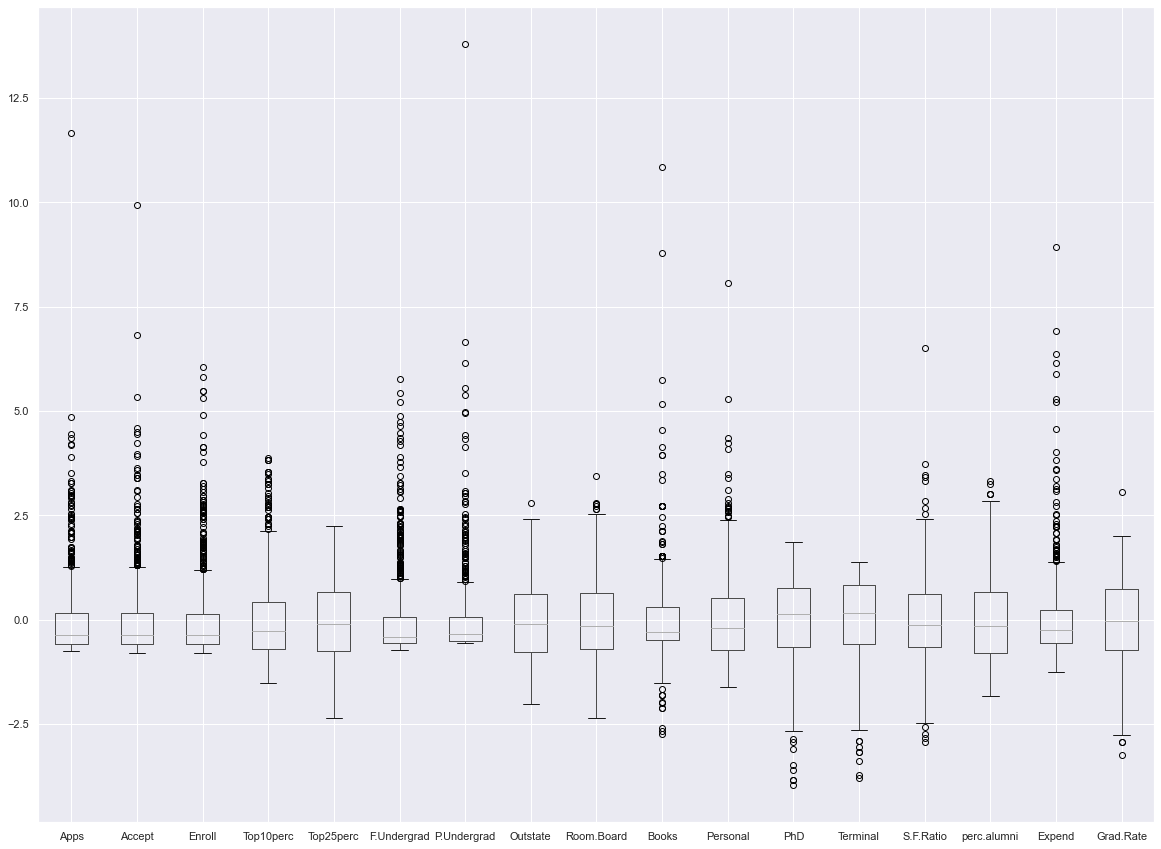

In [7]:
education_scaled.boxplot(figsize=(20,15));

#### >>>>>>>>>>> MinMax Scaling Original Dataframe

In [20]:
min_max = MinMaxScaler()
education_minmax_scale = education.copy()
education_minmax_scale = min_max.fit_transform(education_minmax_scale.iloc[:,1:])

In [22]:
education_minmax_scale_df = pd.DataFrame(education_minmax_scale, columns=education.columns[1:])
education_minmax_scale_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


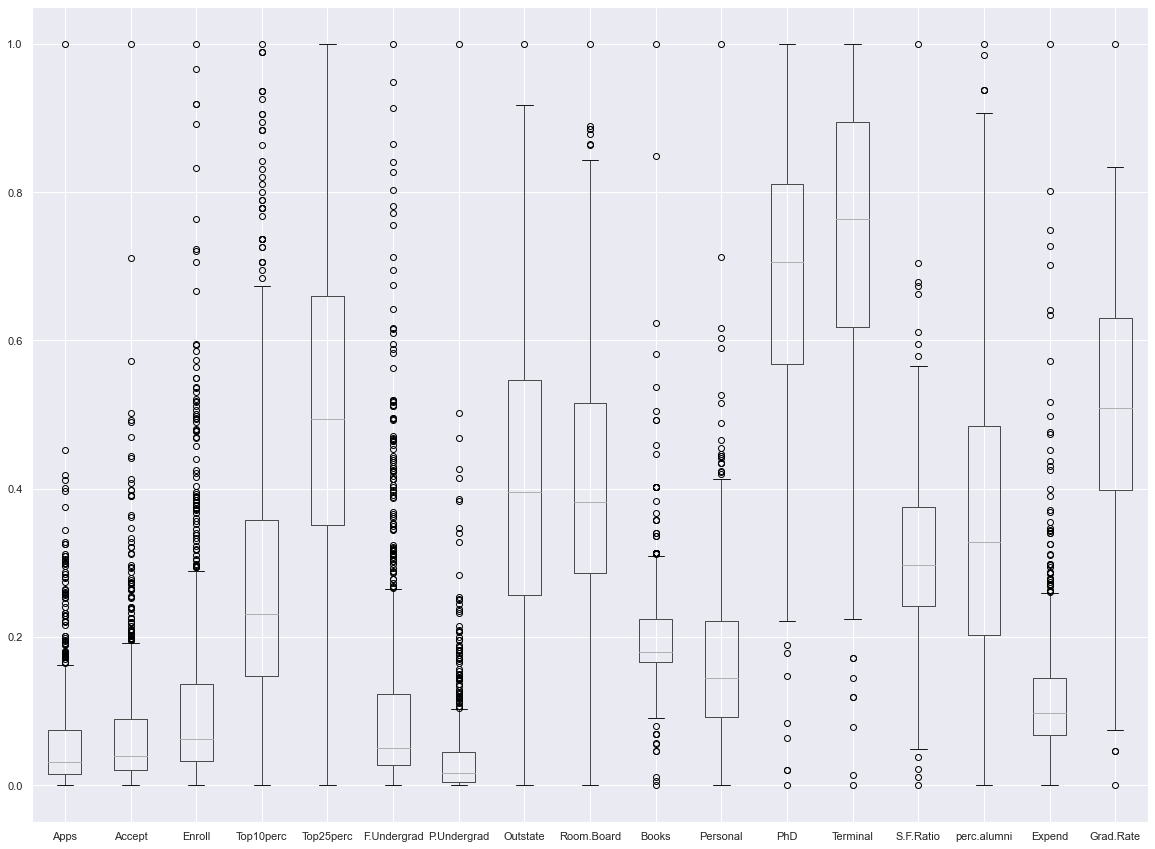

In [31]:
education_minmax_scale_df.boxplot(figsize=(20,15));

##### 2.3) Comment on the comparison between covariance and the correlation matrix.

#### ORIGINAL DATA

In [113]:
education_corr = education.corr()
education_corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [114]:
education_cov = education.cov()
education_cov

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


#### SCALED DATA

In [116]:
education_scaled_corr = education_scaled.corr()
education_scaled_corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [117]:
education_scaled_cov = education_scaled.cov()
education_scaled_cov

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


Covariance is affected by the change in scale. 

##### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

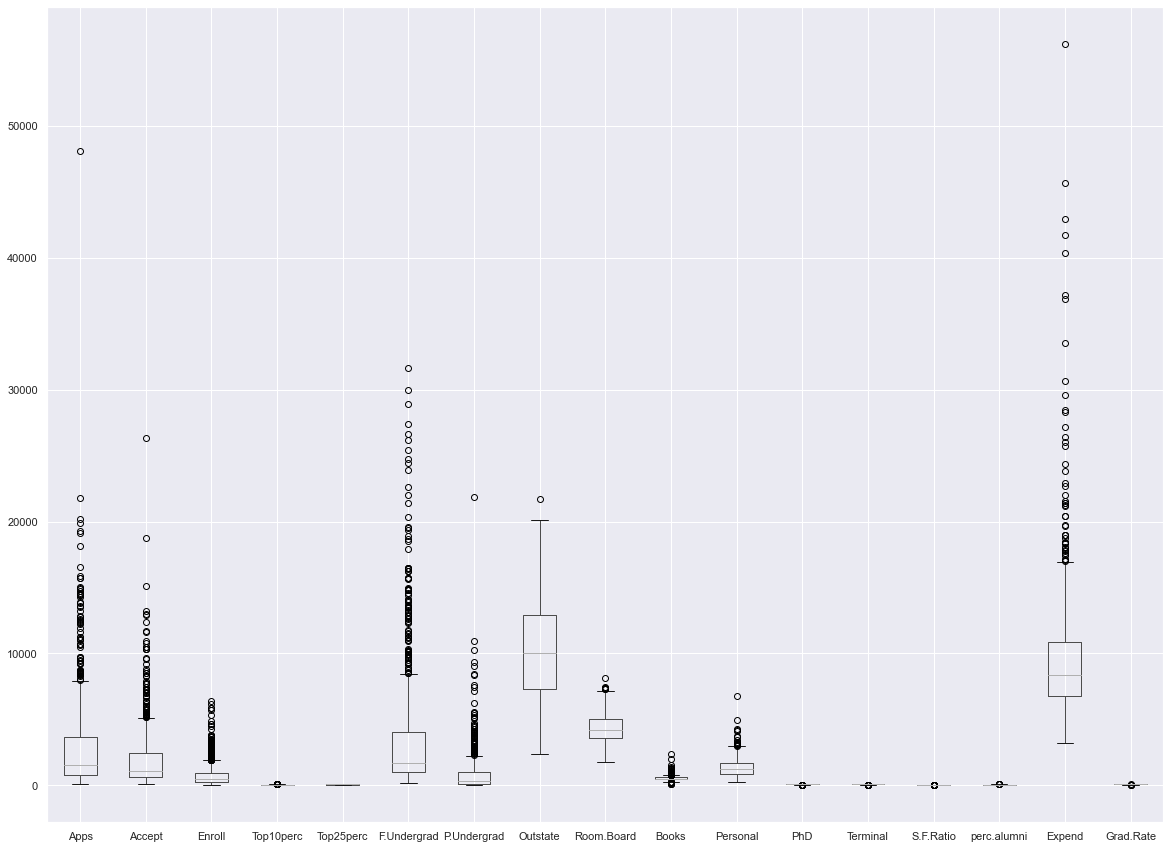

In [4]:
education.boxplot(figsize=(20,15));

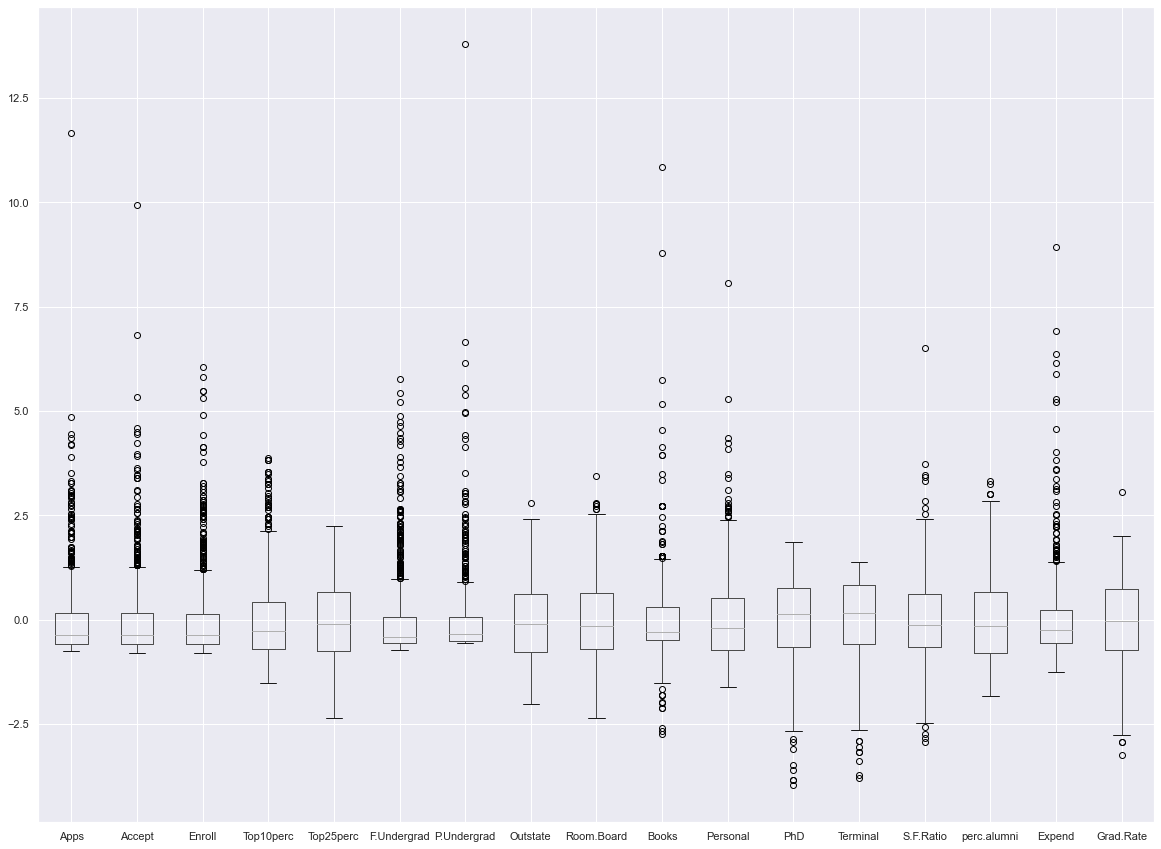

In [6]:
education_scaled.boxplot(figsize=(20,15))

##### 2.5) Build the covariance matrix and calculate the eigenvalues and the eigenvector.

In [8]:
cov_matrix = np.cov(education_scaled.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigen Vectors:\n", eigen_vectors)
print("\nEigen Values:\n", eigen_values)

Eigen Vectors:
 [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
  -

In [10]:
eigen_vectors.shape, eigen_values.shape

((17, 17), (17,))

##### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [5]:
pc_first_component = -(eigen_vectors.T[0])
pc_first_component

array([ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
        0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
       -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
        0.31890875,  0.25231565])

In [6]:
for eig_vec, column in zip(pc_first_component,education.columns[1:]):
    print(round(eig_vec,2),'*',column,' + ', end = ' ')

0.25 * Apps  +  0.21 * Accept  +  0.18 * Enroll  +  0.35 * Top10perc  +  0.34 * Top25perc  +  0.15 * F.Undergrad  +  0.03 * P.Undergrad  +  0.29 * Outstate  +  0.25 * Room.Board  +  0.06 * Books  +  -0.04 * Personal  +  0.32 * PhD  +  0.32 * Terminal  +  -0.18 * S.F.Ratio  +  0.21 * perc.alumni  +  0.32 * Expend  +  0.25 * Grad.Rate  +  

#### >>>> Cross checking with PCA

In [12]:
pca = PCA()
data_reduced = pca.fit_transform(education_scaled)
pca.components_[0]

array([ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
        0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
       -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
        0.31890875,  0.25231565])

In [9]:
for eig_vec, column in zip(pca.components_[0],education.columns[1:]):
    print(round(eig_vec,2),'*',column,' + ', end = ' ')

0.25 * Apps  +  0.21 * Accept  +  0.18 * Enroll  +  0.35 * Top10perc  +  0.34 * Top25perc  +  0.15 * F.Undergrad  +  0.03 * P.Undergrad  +  0.29 * Outstate  +  0.25 * Room.Board  +  0.06 * Books  +  -0.04 * Personal  +  0.32 * PhD  +  0.32 * Terminal  +  -0.18 * S.F.Ratio  +  0.21 * perc.alumni  +  0.32 * Expend  +  0.25 * Grad.Rate  +  

##### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
##### Perform PCA and export the data of the Principal Component scores into a data frame.

In [10]:
tot = sum(eigen_values)
variance_explained = [(i/tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_variance_explained = np.cumsum(variance_explained)
print('Variance Explained:\n',variance_explained)
print('\n Cumulative Variance Explained:\n',cum_variance_explained)

Variance Explained:
 [32.02062819886915, 26.34021443611248, 6.9009165542224995, 5.922989222926291, 5.488405110358482, 4.98470095455744, 3.5588714917466553, 3.4536213369992645, 3.1172336798217217, 2.3751915258937992, 1.8414263209386887, 1.296041400123535, 0.9857541228001165, 0.845842335083003, 0.517125583373192, 0.2157540100727578, 0.13528371610095175]

 Cumulative Variance Explained:
 [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


##### >>>> Scree Plot

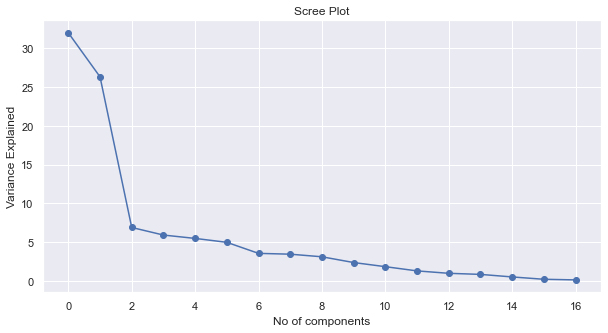

In [10]:
plt.figure(figsize=(10,5))
plt.plot(variance_explained, marker = 'o');
plt.xlabel('No of components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

In [21]:
pc_name = ['PC' + str(i) for i in np.arange(1,18)]
pca_comp = pd.DataFrame({'PC':pc_name, 
                        'Variance': np.round(variance_explained,2), 
                        'Cumulative Variance':np.round(cum_variance_explained,2)})
pca_comp

,PC,Variance,Cumulative Variance
0,PC1,32.02,32.02
1,PC2,26.34,58.36
2,PC3,6.90,65.26
3,PC4,5.92,71.18
4,PC5,5.49,76.67
5,PC6,4.98,81.66
6,PC7,3.56,85.22
7,PC8,3.45,88.67
8,PC9,3.12,91.79
9,PC10,2.38,94.16


The first component explains only 32 % of the variance, so more components are needed in order for the added sum to be at leat 85%

We can take first 7 components as after that, there seems to be an elbow effect i.e. variance only keeps decreasing

In [22]:
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(education_scaled)
data_reduced.T

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [23]:
pca_df = pd.DataFrame(data_reduced, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306,0.638443
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137,0.236753
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592,-0.248276
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508,-1.249356
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918,-2.159220
...,...,...,...,...,...,...,...
772,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429,-0.165021
773,0.199389,-0.686689,0.051564,0.562269,0.375191,0.373343,0.848453
774,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014,-1.317492
775,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937,0.083328


In [18]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [24]:
pca_comp = pd.DataFrame(np.round(pca.components_,2), 
                        columns=education.columns[1:], 
                        index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,0.25,0.21,0.18,0.35,0.34,0.15,0.03,0.29,0.25,0.06,-0.04,0.32,0.32,-0.18,0.21,0.32,0.25
PC2,0.33,0.37,0.40,-0.08,-0.04,0.42,0.32,-0.25,-0.14,0.06,0.22,0.06,0.05,0.25,-0.25,-0.13,-0.17
PC3,-0.06,-0.10,-0.08,0.04,-0.02,-0.06,0.14,0.05,0.15,0.68,0.50,-0.13,-0.07,-0.29,-0.15,0.23,-0.21
PC4,0.28,0.27,0.16,-0.05,-0.11,0.10,-0.16,0.13,0.18,0.09,-0.23,-0.53,-0.52,-0.16,0.02,0.08,0.27
PC5,0.01,0.06,-0.06,-0.40,-0.43,-0.04,0.30,0.22,0.56,-0.13,-0.22,0.14,0.20,-0.08,-0.22,0.08,-0.11
PC6,-0.02,0.01,-0.04,-0.05,0.03,-0.04,-0.19,-0.03,0.16,0.64,-0.33,0.09,0.15,0.49,-0.05,-0.30,0.22
PC7,-0.04,-0.01,-0.03,-0.16,-0.12,-0.03,0.06,0.11,0.21,-0.15,0.63,-0.00,-0.03,0.22,0.24,-0.23,0.56


In [20]:
(pca.explained_variance_ratio_)*100

array([32.0206282 , 26.34021444,  6.90091655,  5.92298922,  5.48840511,
        4.98470095,  3.55887149])

##### 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

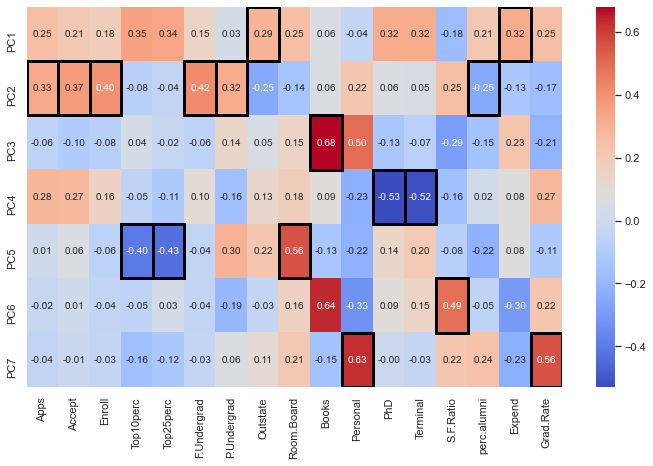

In [39]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(12,7))
col_max = pca_comp.abs().idxmax(axis = 0)
ax = sns.heatmap(pca_comp, annot = True, fmt = '.2f', cmap = 'coolwarm')

for col, var in enumerate(pca_comp.columns):
    position = pca_comp.index.get_loc(col_max[var])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor = 'black', lw = 3))


In [32]:
np.round(pca_df.corr(),2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PC1,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
PC2,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0
PC3,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0
PC4,0.0,0.0,0.0,1.0,-0.0,0.0,0.0
PC5,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0
PC6,-0.0,-0.0,-0.0,0.0,0.0,1.0,0.0
PC7,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0


    1.	The variance explained is low for each component (the first PC explains only 32% of overall variance), so more number of principal components need to be taken – maybe 7 to 8

    2.	The PCs perpendicular to each other
